## Cellula Task 2

 Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [ ]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
!pip install shap==0.42.0
!pip install imbalanced-learn==0.10.1
!pip install scikit-learn==1.2.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import shap
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Data Overview

In [ ]:
data_path = '/content/drive/MyDrive/CSV/first inten project.csv'
df = pd.read_csv(data_path)
df.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [ ]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

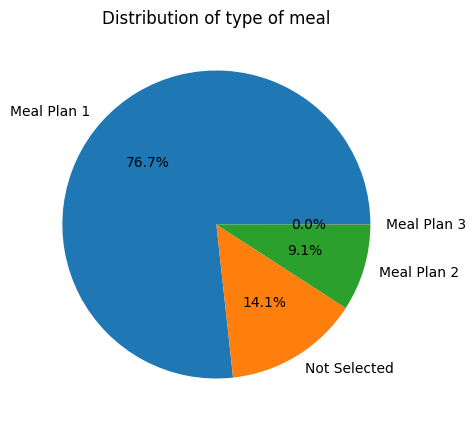

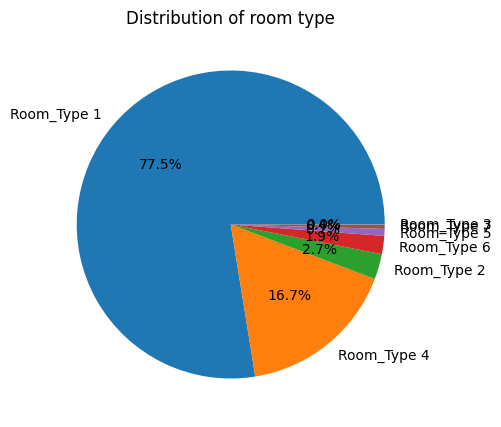

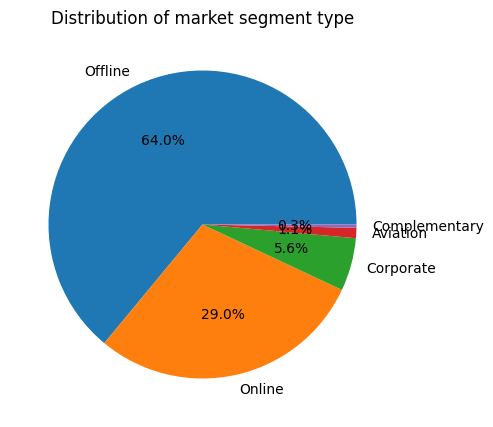

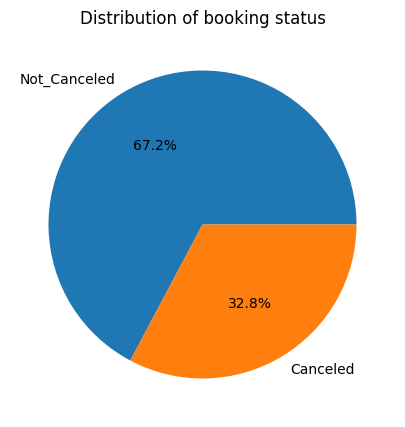

In [ ]:
cat_features = ['type of meal', 'room type', 'market segment type', 'booking status']
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    plt.pie(df[feature].value_counts(),
            labels=df[feature].unique(),
            autopct='%1.1f%%'
    )
    plt.title(f'Distribution of {feature}')
    plt.show()
    print()

In [ ]:
#df['total_nights'] = df['number of week nights'] + df['number of weekend nights']
#df['average_price_per_night'] = (df['average price '] / df['total_nights']).round(2)
#df['total_guest'] = df['number of adults'] + df['number of children']
#df['average_price_per_night_per_guest'] = (df['average_price_per_night'] / df['total_guest']).round(2)
#df.head()
#num_features = ['number of adults', 'number of children', 'total_guest', 'number of weekend nights',
#                'number of week nights', 'lead time', 'average price ', 'car parking space',
#                'repeated', 'P-C', 'P-not-C', 'special requests', 'total_nights', 'average_price_per_night',
#                'total_guest', 'average_price_per_night_per_guest']
#for feature in num_features:
#    plt.figure(figsize=(10, 5))
#    sns.histplot(df[feature], kde=True)
#    plt.title(f'Distribution of {feature}')
#    plt.show()
#    print()

# Data preprocessing

Handling Missing Values Null values

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


Data Type verification

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Whitespace and Other Cleaning

In [ ]:
# Select object columns
object_cols = df.select_dtypes(include='object').columns

# Remove whitespaces from object columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

In [ ]:
df = df.drop('Booking_ID', axis=1)

In [ ]:
df[df[['date of reservation']].isnull().any(axis=1)]

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status


In [ ]:
def split_date(date):
    if '/' in date:  # MM/DD/YYYY format
        month, day, year = date.split('/')
    elif '-' in date:  # YYYY-MM-DD format
        year, month, day = date.split('-')
    else:
        return [np.nan, np.nan, np.nan]  # Handle unexpected formats

    return [int(month), int(day), int(year)]

# Apply the split_date function to the 'date of reservation' column
df[['month', 'day', 'year']] = df['date of reservation'].apply(split_date).apply(pd.Series)
df = df.drop('date of reservation', axis=1)

In [ ]:
df[df[['year', 'month', 'day']].isnull().any(axis=1)]

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year


In [ ]:
df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})
df[['car parking space', 'repeated', 'P-C', 'P-not-C']] = df[['car parking space', 'repeated', 'P-C', 'P-not-C']].astype(int)
df['room type'] = df['room type'].str.replace('Room_Type ', '').astype(int)
#df = pd.get_dummies(df, columns=['type of meal', 'market segment type'], drop_first=True)
# Mapping for 'type of meal'
meal_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2
}
df['type of meal'] = df['type of meal'].map(meal_mapping)

# Mapping for 'market segment type'
market_mapping = {
    'Online': 0,
    'Offline': 1,
    'Corporate': 2,
    'Aviation': 3,
    'Complementary': 4,
    'Groups': 5,
    'Offline TA/TO': 6
}
df['market segment type'] = df['market segment type'].map(market_mapping)

In [ ]:
# Calculate the sum of all values in the 'P-C' column
pc_sum = df['P-C'].sum()
pc_nsum = df['P-not-C'].sum()

# Print the result
print(f"The sum of all values  is: {pc_sum} ,{pc_nsum}")


The sum of all values  is: 847 ,5565


In [ ]:
#df = df.drop('P-C', axis=1)
#df = df.drop('P-not-C', axis=1)

In [ ]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year
0,1,1,2,5,1.0,0,1,224,1,0,0,0,88.00,0,0,10,2,2015
1,1,0,1,3,0.0,0,1,5,0,0,0,0,106.68,1,0,11,6,2018
2,2,1,1,3,1.0,0,1,1,0,0,0,0,50.00,0,1,2,28,2018
3,1,0,0,2,1.0,0,1,211,0,0,0,0,100.00,1,1,5,20,2017
4,1,0,1,2,0.0,0,1,48,0,0,0,0,77.00,0,1,4,11,2018


over sampling

In [ ]:
df.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,5
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


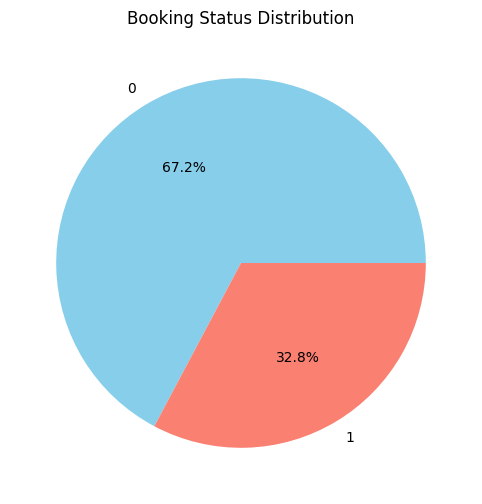

In [ ]:
plt.figure(figsize=(8, 6))
df['booking status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Booking Status Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X = df.drop('booking status', axis=1)
y = df['booking status']
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.DataFrame(X_resampled, columns=X.columns)
df['booking status'] = y_resampled

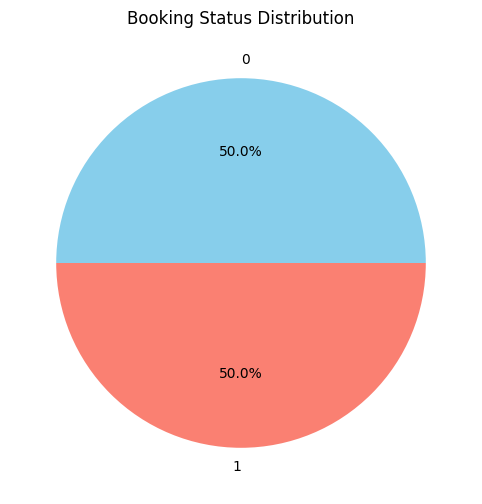

In [ ]:
plt.figure(figsize=(8, 6))
df['booking status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Booking Status Distribution')
plt.ylabel('')
plt.show()

# Outlier Detection and Handling

 IQR

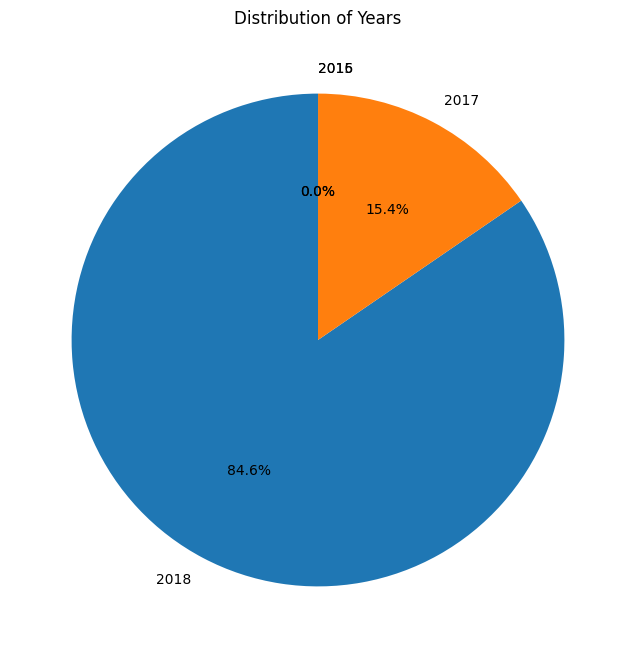

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming df is the original dataframe
X = df.drop('year', axis=1)
y = df['year']

# Define the sampling strategy to maintain 2018 as the majority class
sampling_strategy = {2018: len(y[y == 2018]), 2017: int(len(y[y == 2018]) ),
                     2016: int(len(y[y == 2018]) * 0.3), 2015: int(len(y[y == 2018]) * 0.3)}

# Apply RandomOverSampler with the custom strategy
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['year'] = y_resampled
df['year'] = y_resampled
# Check the distribution after resampling
#print(df_resampled['year'].value_counts())
print(df['year'].value_counts())

year
2018    41263
2017    41263
2015    12378
2016    12378
Name: count, dtype: int64


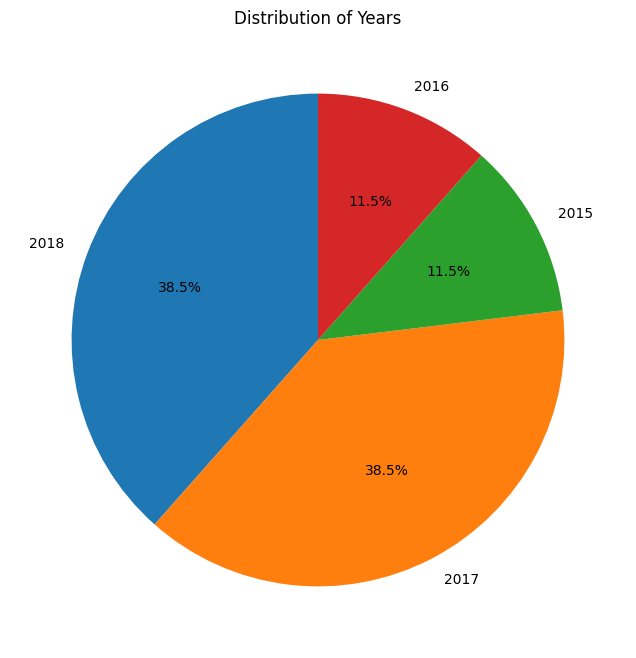

In [ ]:
# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Loop through numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print outliers for the current column
    if not outliers.empty:
        print(f"Outliers removed from {col}:")
        print(outliers)

    # Remove outliers
    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

Outliers removed from number of adults:
       number of adults  number of children  number of weekend nights  \
372                   4                   0                         0   
657                   4                   0                         0   
3153                  4                   0                         0   
9479                  4                   0                         1   
14046                 4                   0                         2   
15220                 4                   0                         1   
15480                 4                   0                         2   
17359                 4                   0                         2   
23366                 4                   0                         0   
23526                 4                   0                         0   
23542                 4                   0                         0   
24526                 4                   0                         1   
25972      

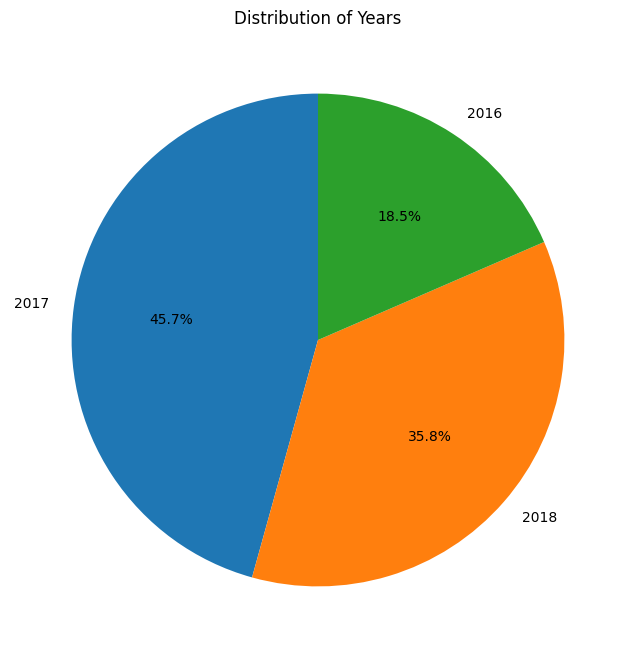

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

# Feature Engineering

Feature selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66949 entries, 1 to 107281
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          66949 non-null  int64  
 1   number of children        66949 non-null  int64  
 2   number of weekend nights  66949 non-null  int64  
 3   number of week nights     66949 non-null  int64  
 4   type of meal              66949 non-null  float64
 5   car parking space         66949 non-null  int64  
 6   room type                 66949 non-null  int64  
 7   lead time                 66949 non-null  int64  
 8   market segment type       66949 non-null  int64  
 9   repeated                  66949 non-null  int64  
 10  P-C                       66949 non-null  int64  
 11  P-not-C                   66949 non-null  int64  
 12  average price             66949 non-null  float64
 13  special requests          66949 non-null  int64  
 14  month     

Train Test split

In [ ]:
X = df.drop('booking status', axis=1)
y = df['booking status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['number of adults', 'number of weekend nights', 'number of week nights', 'type of meal', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', 'month', 'day', 'year']


In [ ]:
from sklearn.feature_selection import RFE
X = df.drop('booking status', axis=1)
y = df['booking status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using SelectKBest
model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['number of weekend nights', 'number of week nights', 'type of meal', 'lead time', 'market segment type', 'average price ', 'special requests', 'month', 'day', 'year']


In [ ]:
#import shap
#import matplotlib.pyplot as plt
#
## Create a SHAP explainer for your RandomForestClassifier
#best_model = RandomForestClassifier()
#best_model.fit(X_train, y_train)
#explainer = shap.TreeExplainer(best_model)
#
## Calculate SHAP values for the test set
#shap_values = explainer.shap_values(X_test)
#
## Summary plot
#shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
#plt.show()

Explained variance ratio: [0.27795814 0.12838689 0.11470836 0.09087598 0.08894184 0.07745965
 0.0697659  0.05081095 0.0433608  0.03671634]


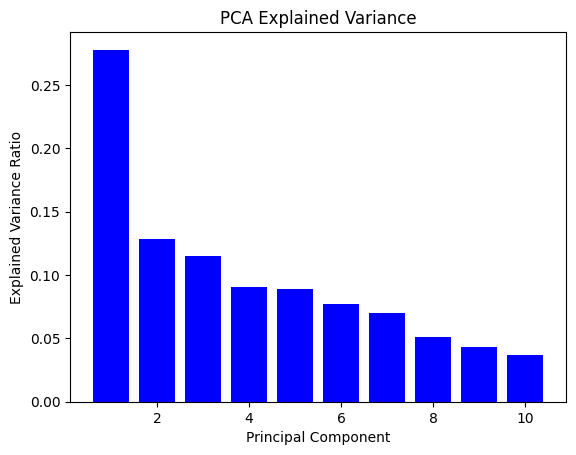

In [ ]:

# Standardize the data (PCA requires scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA - Choose the number of components (e.g., 10)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio to understand how much variance is retained
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# To visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.bar(range(1, 11), explained_variance_ratio, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

# Model Test & Accuracy

In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming you have your features (X) and labels (y) ready
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and SVM model
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(probability=True, kernel='rbf', C=1.0, gamma='scale'))  # SVM classifier with RBF kernel
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict probabilities for the test set (only available if `probability=True` in SVC)
y_pred_proba = svm_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Convert probabilities to class labels with a threshold (e.g., 0.5 for binary classification)
y_pred_svm = (y_pred_proba > 0.5).astype(int)

# Evaluate the model using various metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Test Accuracy: 0.9006
AUC-ROC: 0.9548
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6270
           1       0.90      0.91      0.91      7120

    accuracy                           0.90     13390
   macro avg       0.90      0.90      0.90     13390
weighted avg       0.90      0.90      0.90     13390



In [ ]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming you have your features (X) and labels (y) ready
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model building function
def build_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))  # First layer with 128 neurons
    model.add(Dropout(0.3))  # Dropout to prevent overfitting
    model.add(Dense(64, activation='relu'))  # Second layer with 64 neurons
    model.add(Dropout(0.3))  # Another dropout layer
    model.add(Dense(32, activation='relu'))  # Third layer with 32 neurons
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping to prevent overfitting by monitoring validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a pipeline with standard scaling and the Keras classifier
dl_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('nn', KerasClassifier(build_fn=build_model, epochs=70, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping]))
])

# Train the model
dl_pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = dl_pipeline.predict_proba(X_test)

# Convert probabilities to class labels with a threshold (e.g., 0.5 for binary classification)
y_pred_dl = (y_pred_proba[:, 1] > 0.5).astype(int) # Select the probabilities for the positive class and convert to binary labels

# Evaluate the model using various metrics
dl_accuracy = accuracy_score(y_test, y_pred_dl)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1]) # Use probabilities for the positive class

print(f"Deep Learning Test Accuracy: {dl_accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Deep Learning Classification Report:")
print(classification_report(y_test, y_pred_dl))


Epoch 1/70
1339/1339 [==============================] - 6s 3ms/step - loss: 0.3676 - accuracy: 0.8261 - val_loss: 0.2916 - val_accuracy: 0.8751
Epoch 2/70
1339/1339 [==============================] - 6s 5ms/step - loss: 0.3107 - accuracy: 0.8590 - val_loss: 0.2790 - val_accuracy: 0.8757
Epoch 3/70
1339/1339 [==============================] - 4s 3ms/step - loss: 0.2896 - accuracy: 0.8695 - val_loss: 0.2482 - val_accuracy: 0.8926
Epoch 4/70
1339/1339 [==============================] - 4s 3ms/step - loss: 0.2719 - accuracy: 0.8792 - val_loss: 0.2412 - val_accuracy: 0.8966
Epoch 5/70
1339/1339 [==============================] - 6s 4ms/step - loss: 0.2622 - accuracy: 0.8827 - val_loss: 0.2329 - val_accuracy: 0.8981
Epoch 6/70
1339/1339 [==============================] - 4s 3ms/step - loss: 0.2569 - accuracy: 0.8859 - val_loss: 0.2276 - val_accuracy: 0.9010
Epoch 7/70
1339/1339 [==============================] - 4s 3ms/step - loss: 0.2481 - accuracy: 0.8887 - val_loss: 0.2220 - val_accuracy:

Random Forest

In [ ]:
# Separate features from the target
X = df[selected_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Set up the pipeline (including feature scaling or feature engineering if needed)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply feature scaling
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform cross-validation on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# Hyperparameter tuning using RandomizedSearchCV (for efficiency)
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=cv, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print(f"Best hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")


Cross-validation accuracy: 0.9646
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters from RandomizedSearchCV: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 30, 'classifier__bootstrap': False}
Test accuracy: 0.9704


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer for your RandomForestClassifier
explainer = shap.TreeExplainer(best_model.named_steps['classifier'])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
plt.show()